# Practicioners Seminar

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
from statsmodels.formula.api import ols

## Task 2

### A correlation heatmap for currencies and equity markets

In [2]:
currencies = "Data/FX_CHF_ALL_1971-2020.xlsx"
msci_all_local = "Data/MSCI_ALL_LOCAL.xlsx"
msci_all_usd_chf = "Data/MSCI_ALL_USD_CHF.xlsx"
df_currencies = pd.read_excel(currencies, header=0, index_col=0, sheet_name="Sheet1")
df_msci_all_local = pd.read_excel(msci_all_local, header=3, index_col=0, sheet_name="CleanTimeSeries")
df_msci_all_usd_chf = pd.read_excel(msci_all_usd_chf, header=3, index_col=0, sheet_name="CleanTimeSeries")

combined_df = pd.concat([df_currencies, df_msci_all_local], axis=1, join="inner")
combined_df_usd_chf = pd.concat([df_currencies, df_msci_all_usd_chf], axis=1, join="inner")

In [3]:
combined_df

,CHFUSD,CHFEUR,CHFGBP,CHFAUD,CHFJPY,CHFCAD,MSDLSZ Index,MSDLWI Index,MSDLE15 Index,MSDLAS Index,MSDLCA Index,MSDLJN Index,MSDLUK Index,MXUS Index
Date,,,,,,,,,,,,,,
2020-12-21,1.1291,0.9219,0.8386,1.4880,116.655,1.4516,1373.148,1981.352,1575.377,1309.248,2194.804,1091.115,1798.630,3618.284
2020-12-18,1.1323,0.9235,0.8369,1.4857,116.924,1.4474,1400.882,1994.796,1609.748,1310.328,2199.244,1093.880,1830.686,3630.908
2020-12-17,1.1308,0.9216,0.8321,1.4830,116.543,1.4385,1401.998,1999.316,1612.119,1325.069,2212.786,1093.709,1837.093,3639.045
2020-12-16,1.1298,0.9261,0.8360,1.4911,116.852,1.4394,1390.313,1987.536,1608.909,1309.803,2201.855,1088.345,1844.342,3613.127
2020-12-15,1.1291,0.9290,0.8385,1.4937,117.050,1.4340,1375.116,1980.992,1596.729,1300.346,2192.114,1085.449,1828.248,3606.650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1971-01-08,0.2320,0.0000,0.0000,0.0000,83.004,0.0000,NaN,93.948,NaN,NaN,NaN,NaN,NaN,NaN
1971-01-07,0.2320,0.0000,0.0000,0.0000,83.027,0.0000,NaN,93.948,NaN,NaN,NaN,NaN,NaN,NaN
1971-01-06,0.2319,0.0000,0.0000,0.0000,83.005,0.0000,87.743,93.948,87.312,NaN,104.926,84.639,89.849,NaN


<AxesSubplot:>

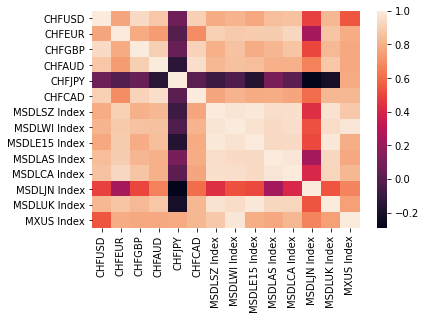

In [4]:
return_cor = combined_df.corr()
sns.heatmap(return_cor, xticklabels=return_cor.columns.values, yticklabels=return_cor.columns.values)

In [5]:
#combined_df.corr()

<AxesSubplot:>

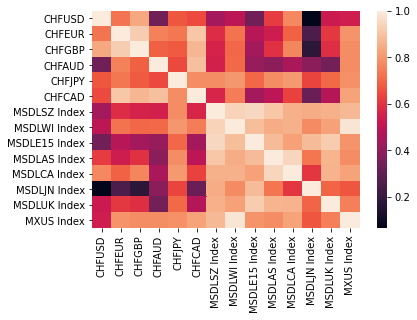

In [6]:
z=combined_df
z = z[z!=0].dropna()
sns.heatmap(z.corr(), xticklabels=z.columns.values, yticklabels=z.columns.values)

In [7]:
# Return df
return_df = np.log(combined_df.sort_index()).diff()
return_df = return_df[return_df!=0].dropna()
return_df

,CHFUSD,CHFEUR,CHFGBP,CHFAUD,CHFJPY,CHFCAD,MSDLSZ Index,MSDLWI Index,MSDLE15 Index,MSDLAS Index,MSDLCA Index,MSDLJN Index,MSDLUK Index,MXUS Index
Date,,,,,,,,,,,,,,
2001-01-12,-0.003555,-0.002768,0.010104,-0.001085,0.002187,0.001079,-0.004605,0.000817,0.009610,0.007799,-0.011518,0.003886,0.007129,-0.005513
2001-01-16,0.000981,0.000770,0.004579,-0.002800,-0.009805,0.002933,0.000322,0.001087,-0.011794,-0.005275,-0.004379,0.014037,-0.012304,0.007463
2001-01-17,-0.005733,0.001538,-0.006755,-0.002627,0.003464,-0.002172,0.012626,0.008307,0.019898,0.003190,0.016867,0.007607,0.017656,0.000938
2001-01-18,0.014030,0.005670,0.014181,-0.001452,0.007990,0.015106,-0.004065,0.008170,-0.001742,0.011288,0.005605,0.015148,0.002110,0.013361
2001-01-19,-0.011077,-0.001376,-0.004066,0.003898,-0.018416,-0.011741,-0.008520,-0.001256,-0.003342,0.007879,0.031921,0.002578,-0.001239,-0.003269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-15,0.001507,0.000646,-0.008905,-0.001806,-0.002355,-0.003481,-0.002760,0.008240,0.001327,-0.003987,0.005970,-0.004827,-0.003264,0.012667
2020-12-16,0.000620,-0.003127,-0.002986,-0.001742,-0.001693,0.003759,0.010991,0.003298,0.007599,0.007246,0.004434,0.002664,0.008764,0.001794
2020-12-17,0.000885,-0.004871,-0.004676,-0.005447,-0.002648,-0.000625,0.008369,0.005909,0.001993,0.011588,0.004952,0.004916,-0.003938,0.007148


#### Heatmap local

<AxesSubplot:>

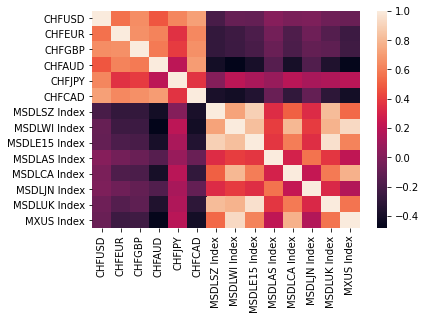

In [8]:
sns.heatmap(return_df.corr(), xticklabels=z.columns.values, yticklabels=z.columns.values)

Problem that MXUS is calculated with the USD method and not local as the others? Even though USD is the local currency of MXUS? 
Solved, found MXUS LOCAL on Refinitiv (only from 2001 onwards though)

#### Heatmap USD

<AxesSubplot:>

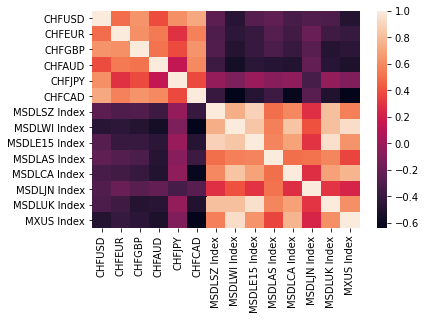

In [9]:
return_df_usd_chf = np.log(combined_df_usd_chf.sort_index()).diff()
return_df_usd_chf = return_df_usd_chf[return_df_usd_chf!=0].dropna()
sns.heatmap(return_df_usd_chf.corr(), xticklabels=z.columns.values, yticklabels=z.columns.values)

### Determine Hedge Ratios
#### Through regression
Need to find out which variables to take exactly for the regression, and what our hedge ratio then is!

In [10]:
return_df_usd_chf

,CHFUSD,CHFEUR,CHFGBP,CHFAUD,CHFJPY,CHFCAD,MSDUSZ Index,MXWO Index,MSDUE15 Index,MSDUAS Index,MSDUCA Index,MSDUJN Index,MSDUUK Index,MXUS Index
Date,,,,,,,,,,,,,,
1999-01-04,0.007126,-0.010131,0.006169,-0.007319,-0.011487,0.000088,0.034300,0.005263,0.030163,0.013218,0.015359,-0.025172,-0.008208,-0.005902
1999-01-05,-0.004791,0.001454,0.003865,0.005977,-0.008943,-0.012423,0.016914,0.014652,0.015210,-0.000490,0.028925,-0.002102,0.017190,0.017530
1999-01-07,0.010664,0.003556,0.001372,-0.013180,-0.007424,0.000180,-0.024248,-0.010773,-0.024040,0.013453,-0.012713,0.015648,-0.020444,-0.008048
1999-01-08,-0.012336,-0.001453,-0.001143,-0.002299,-0.012811,-0.025387,0.014452,0.009643,0.006226,-0.004585,0.017078,-0.002827,0.010488,0.014228
1999-01-11,-0.003633,0.003870,0.002513,-0.026343,-0.023289,-0.008794,-0.020297,-0.008880,-0.016248,0.010349,-0.004693,0.016840,-0.010060,-0.009474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-15,0.001507,0.000646,-0.008905,-0.001806,-0.002355,-0.003481,-0.000394,0.009011,0.004379,-0.003815,0.008763,-0.001732,0.002724,0.012442
2020-12-16,0.000620,-0.003127,-0.002986,-0.001742,-0.001693,0.003759,0.013530,0.005301,0.012317,0.011685,0.003483,0.005916,0.017143,0.002920
2020-12-17,0.000885,-0.004871,-0.004676,-0.005447,-0.002648,-0.000625,0.006282,0.004711,0.004307,0.015746,0.005230,0.006741,0.000326,0.004325


In [11]:
# Define X and Y of regression (in case they are from different data frames)

# First remove spaces from column names
x_columns = return_df_usd_chf.columns
x_columns = [x.replace(' ', '') for x in x_columns]
return_df_usd_chf.columns = x_columns

y = return_df_usd_chf['MXWOIndex']
x_columns = return_df_usd_chf.columns
x_columns = x_columns.drop('MXWOIndex')
x = return_df_usd_chf[x_columns]

# Create common df
reg_df = pd.concat([y, x], axis=1, join="inner")

In [12]:
# Multivariate regression
formula = "MXWOIndex ~ CHFUSD + CHFEUR + CHFGBP + CHFAUD + CHFJPY + CHFCAD + MSDUSZIndex + MSDUE15Index + MSDUASIndex + MSDUCAIndex + MSDUJNIndex + MSDUUKIndex + MXUSIndex"
factor_model = ols(formula, data = reg_df)
factor_model = factor_model.fit()
factor_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              MXWOIndex   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 1.426e+05
Date:                Mon, 11 Jan 2021   Prob (F-statistic):               0.00
Time:                        16:32:52   Log-Likelihood:                 30390.
No. Observations:                5122   AIC:                        -6.075e+04
Df Residuals:                    5108   BIC:                        -6.066e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     4.947e-06   8.98e-06      0.551      0.582   -1.27e-05    2.25e-05
CHFUSD          -0.0117      0.002     -4.909      0.000      -0.016      -0.007
CHFEUR           0.0092      0.003      3.166      0.002       0.004       0.015
CHFGBP           0.0043      0.002      1.926      0.054   -7.68e-05       0.009
CHFAUD           0.0026      0.002      1.696      0.090      -0.000       0.006
CHFJPY          -0.0017      0.002     -1.006      0.315      -0.005       0.002
CHFCAD           0.0081      0.002      3.646      0.000       0.004       0.012
MSDUSZIndex     -0.0039      0.002     -2.269      0.023      -0.007      -0.001
MSDUE15Index     0.3011      0.003    103.765      0.000       0.295       0.307
MSDUASIndex      0.0396      0.001     45.383      0.000       0.038       0.041
MSDUCAIndex      0.0343      0.001     31.158      0.000       0.032       0.036
MSDUJNIndex      0.1017      0.001    129.754      0.000       0.100       0.103
MSDUUKIndex     -0.0058      0.002     -2.559      0.011      -0.010      -0.001
MXUSIndex        0.5378      0.001    490.805      0.000       0.536       0.540
==============================================================================
Omnibus:                     1405.152   Durbin-Watson:                   2.571
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           125995.467
Skew:                          -0.230   Prob(JB):                         0.00
Kurtosis:                      27.293   Cond. No.                         444.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Portfolio optimization approach
Probably need to change to black litterman approach with market implied expected returns. For currency pairs the market implied expected returns should be given by interest rate differentials. Also how is the hedge done? Probably not by keeping part of portfolio in foreign currency cash! If its done through forwards, we need to take some margin assumptions!

/usr/local/Cellar/jupyterlab/2.2.8/libexec/lib/python3.8/site-packages/pandas/core/indexing.py:1842: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


<AxesSubplot:xlabel='Date'>

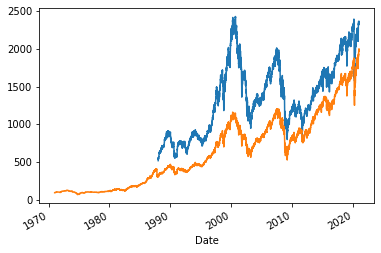

In [13]:
# Portfolio components
portfolio_chf_components = return_df_usd_chf[['MXWOIndex', 'CHFUSD', 'CHFEUR', 'CHFGBP', 'CHFAUD', 'CHFJPY', 'CHFCAD']]

# Prepare covariance matrix and expected return vector
risk_free_rate = pd.read_excel('Data/3M_interest_rates.xlsx', index_col=0, header=1)
risk_free_rate_chf = risk_free_rate['SF0003M  Index']

# For MSCI World denominated in CHF subtract 3 CHF risk free interest rate to get excess returns?
portfolio_chf_excess_returns = portfolio_chf_components

# Change annualized risk free rate to a continuous daily rate in %
risk_free_rate_chf = pow(risk_free_rate_chf/100 + 1, 1/252) - 1

# Subtract the daily risk free rate from MSCI World returns
portfolio_chf_excess_returns.loc[: ,'MXWOIndex'] = portfolio_chf_excess_returns['MXWOIndex'] - risk_free_rate_chf[risk_free_rate_chf.index.isin(portfolio_chf_excess_returns.index)]
portfolio_chf_excess_returns = portfolio_chf_excess_returns[portfolio_chf_excess_returns!=0].dropna()

portfolio_covar = portfolio_chf_excess_returns.cov()
portfolio_expected_return = portfolio_chf_excess_returns.mean()

# Note that MSCI World performance was actually quiet bad for CHF investor since 2000 (see plot)
combined_df_usd_chf['MXWO Index'].plot()
combined_df['MSDLWI Index'].plot()



In [14]:
# Calculate optimal weights
numerator = np.dot(np.linalg.inv(portfolio_covar), portfolio_expected_return) 
denumerator = np.dot(np.dot(np.ones(len(portfolio_expected_return)), np.linalg.inv(portfolio_covar)), portfolio_expected_return)

optimal_weights = pd.Series(numerator / denumerator, index = portfolio_expected_return.index)
optimal_weights

MXWOIndex    0.120298
CHFUSD       0.253402
CHFEUR       0.547001
CHFGBP       0.362027
CHFAUD       0.036432
CHFJPY      -0.014962
CHFCAD      -0.304198
dtype: float64